# Plant Seedling Classification

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import cv2
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [5]:
# List of seedlings classifications
ls=os.listdir("plant-seedlings-classification/train")
ls

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [8]:
# Import train data and classify it
train_data=pd.DataFrame(columns=['ImageId','Class'])
for i in ls:
    image_ls=os.listdir("plant-seedlings-classification/train/"+i)[:300]
    df=pd.DataFrame({'ImageId':image_ls,'Class':[i for j in range(len(image_ls))]})
    train_data=pd.concat([train_data,df],axis=0,ignore_index=True)

In [9]:
train_data.head()

,ImageId,Class
0,0050f38b3.png,Black-grass
1,0183fdf68.png,Black-grass
2,0260cffa8.png,Black-grass
3,05eedce4d.png,Black-grass
4,075d004bc.png,Black-grass


In [10]:
train_data.shape

(3323, 2)

In [11]:
train_data.Class.value_counts()

Scentless Mayweed            300
Fat Hen                      300
Charlock                     300
Loose Silky-bent             300
Sugar beet                   300
Common Chickweed             300
Small-flowered Cranesbill    300
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Class, dtype: int64

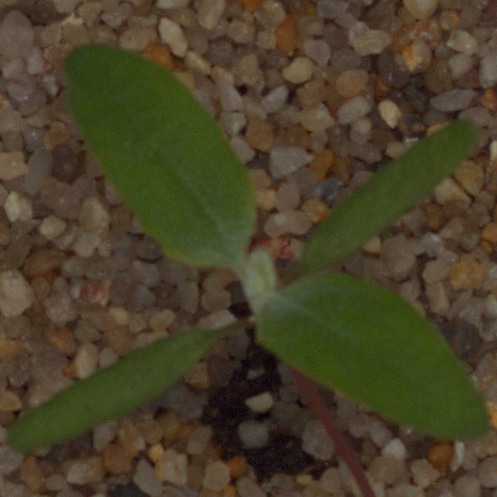

In [3]:
im=Image.open('plant-seedlings-classification/train/Fat Hen/2d6ffd537.png')
im

In [14]:
# Labelling the classes
x = LabelEncoder()
Class = x.fit_transform(train_data.Class)
train_data['ClassId']=Class

In [15]:
train_data.head()

,ImageId,Class,ClassId
0,0050f38b3.png,Black-grass,0
1,0183fdf68.png,Black-grass,0
2,0260cffa8.png,Black-grass,0
3,05eedce4d.png,Black-grass,0
4,075d004bc.png,Black-grass,0


In [16]:
train_data.shape

(3323, 3)

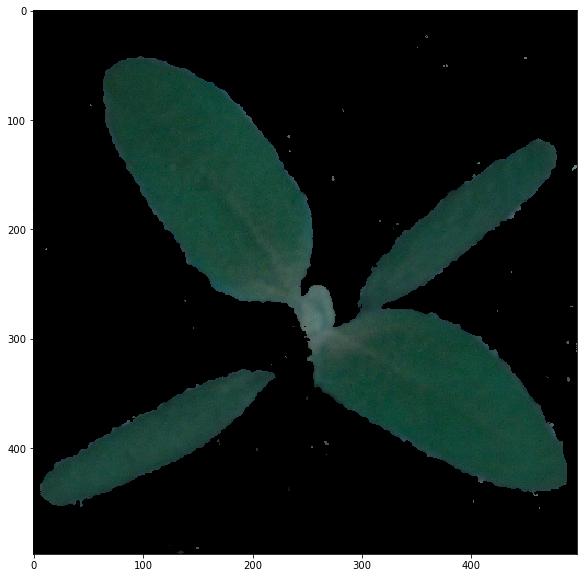

In [4]:
img = cv2.imread('plant-seedlings-classification/train/Fat Hen/2d6ffd537.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (25, 40, 0), (102,255,255))
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]
plt.imshow(green)

In [18]:
# Cleaning the image
img_array=[]
for i in range(len(train_data)):
    img_name=train_data['ImageId'].iloc[i]
    folder=train_data['Class'].iloc[i]
    im_path='plant-seedlings-classification/train/'+folder+'/'+img_name
    img= cv2.imread(im_path, cv2.IMREAD_UNCHANGED)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, (25, 40, 0), (102,255,255))
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    
    # Taking green components of the image which will helo us focus more on the seedlings and then resizing the image
    green_new=cv2.resize(green,(250,250),interpolation = cv2.INTER_AREA)
    
    # Taking one channel of the image
    b=np.dsplit(green_new,green_new.shape[-1])[0]
    
    # Normalizing the image
    img_array.append(b.reshape(250,250)/255.0)

In [20]:
X=np.array(img_array)
X.shape

(3323, 250, 250)

In [21]:
Y=np.array(train_data.ClassId)
Y.shape

(3323,)

In [28]:
# Taking last 20 images of training data as testing data
x_train=X[:-20]
y_train=Y[:-20]
x_test=X[-20:]
y_test=Y[-20:]

In [29]:
x_test.shape,y_test.shape

((20, 250, 250), (20,))

In [30]:
# training the model
mymodel = Sequential()
mymodel.add(Flatten(input_shape=(250,250)))
mymodel.add(Dense(units=100,activation='relu'))
mymodel.add(Dense(units=60,activation='relu'))
mymodel.add(Dense(units=12,activation='softmax'))

In [31]:
mymodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
mymodel.fit(x_train,y_train,epochs=15)

Epoch 1/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 2/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 3/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 4/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 5/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 10/15
3303/3303 [==============================] - 8s 3ms/step - loss: 0.001

In [42]:
print("{0:.2f}".format(mymodel.evaluate(x_test,y_test)[1]))

20/20 [==============================] - 0s 997us/step
0.70


### We get 70 % accuracy for testing data with this model